<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/deteksi%20warna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unggah gambar...


Saving bertiga.jpg to bertiga.jpg


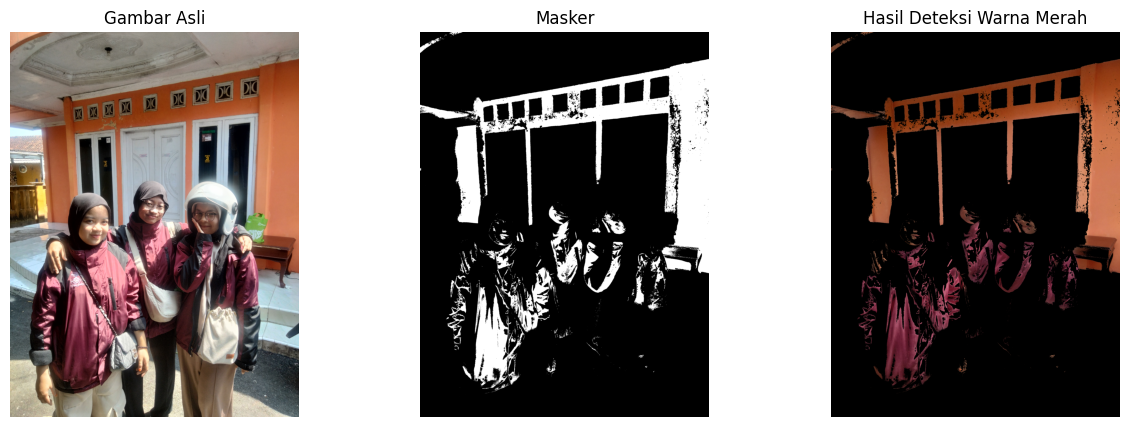

In [1]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar
print("Unggah gambar...")
uploaded = files.upload()

# Baca nama file yang diunggah
image_path = list(uploaded.keys())[0]

# Baca gambar
image = cv2.imread(image_path)

# Konversi gambar ke ruang warna HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Rentang warna merah dalam HSV (terdiri dari dua rentang karena merah berada di ujung lingkaran HSV)
lower_red1 = np.array([0, 120, 70])   # Rentang merah bagian bawah
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70]) # Rentang merah bagian atas
upper_red2 = np.array([180, 255, 255])

# Buat masker untuk warna merah (gabungan dua rentang)
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Terapkan masker ke gambar asli
result = cv2.bitwise_and(image, image, mask=mask)

# Tampilkan gambar asli, masker, dan hasil deteksi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title("Gambar Asli")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Masker
plt.subplot(1, 3, 2)
plt.title("Masker")
plt.imshow(mask, cmap="gray")
plt.axis("off")

# Hasil deteksi
plt.subplot(1, 3, 3)
plt.title("Hasil Deteksi Warna Merah")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()